*ESTUDO INTRODUTÓRIO*

Objetivos:
*   Aprender a como utilizar as bibliotecas geopandas e o geobr
*   Fazer um mapa das unidades de conservação qeu se sobreponha ao município de Porto Alegra, RS

Link para aprender sobre o geobr: https://github.com/ipeaGIT/geobr






In [1]:
# Instalando as Bibliotecas
!pip install geopandas geobr rtree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 442.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.6
    Uninstalling shapely-2.0.6:
      Successfully uninstalled shapely-2.0.6
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4


In [2]:
# Importando as Bibliotecas
import geopandas as gpd
import geobr
import rtree
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos


In [4]:
# Abrindo a lista das bases no geobr (Verificar a lista de dados)
geobr.list_geobr()
#

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [5]:
# FAzendo a análise dos municípios oir Unidade de Conservação (UCs)
muni = geobr.read_municipality(code_muni = 'RS', year = 2020)  #code_muni = 'Sigla do Estado', year = ano que vc quer
muni.head() # Cabeçalho para entender o filtro que faremos


,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,4300034.0,Aceguá,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-54.10842 -31.43275, -54.10367..."
1,4300059.0,Água Santa,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-52.04086 -28.12188, -52.03881..."
2,4300109.0,Agudo,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-53.25392 -29.44907, -53.25371..."
3,4300208.0,Ajuricaba,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-53.79538 -28.10234, -53.78983..."
4,4300307.0,Alecrim,43.0,RS,Rio Grande do Sul,4.0,Sul,"MULTIPOLYGON (((-54.77813 -27.58372, -54.77307..."


<Axes: >

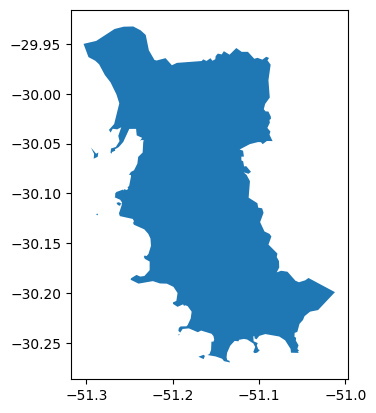

In [6]:
# Pegar um filtro que contemple só o município de Porto Alegre

gdf_muni = muni[muni.name_muni=='Porto Alegre']
# Eu acessei dentro das colunas o nome do município de Porto Alegre (name_muni) e com isso eu filtro com == 'nome do municipio'
gdf_muni.plot()
# Plotei o shape de Porto Alegre
# OBS: gdf (geodataframe)

In [7]:
# Definindo um sistema de projeção

gdf_muni.crs = 'EPSG:4326' # Aqui eu defino !
gdf_muni.crs # Aqui eu confiro...

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Unidades de conservação
# Vou cruzar as bases do municipio de Porto Alegre com as bases dos municípios das UCs

# Pegando as bases da UCs:
uc_gdf = geobr.read_conservation_units(date = 201909, simplified = True, verbose = False)
uc_gdf.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [9]:
# Definindo um sistema de projeção das UCs

uc_gdf.crs = 'EPSG:4326' # Aqui eu defino !
uc_gdf.crs # Aqui eu confiro...

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Conferindo o sistema:
# Os sistemas tem que ser iguais !
uc_gdf.crs == gdf_muni.crs

# Se der True, os dois sistemas estão no mesmo sistema de projeção, podemos fazer a junção

True

In [11]:
# Filtrnado os dados de Porto Alegre (POA)
uc_gdf_poa = gpd.sjoin(uc_gdf, gdf_muni )
uc_gdf_poa

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,...,date,geometry,index_right,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region
283,1987,ÁREA DE PROTEçãO AMBIENTAL ESTADUAL DELTA DO J...,None,Área de Proteção Ambiental,US,estadual,2005,12758,Correto (O poligono corresponde ao memorial de...,Lei ordinária nº 12371 de 14/11/2005,...,201909.0,"MULTIPOLYGON (((-51.41519 -29.99295, -51.42657...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul
1110,2000,PARQUE ESTADUAL DO DELTA DO JACUí,None,Parque,PI,estadual,1976,15176,Aproximado (O poligono representa uma estimati...,Decreto nº 24385 de 30/01/1976,...,201909.0,"MULTIPOLYGON (((-51.23399 -29.99172, -51.22767...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul
1418,3400,PARQUE NATURAL MUNICIPAL SAINT HILAIRE,None,Parque,PI,municipal,2015,13706,Aproximado (O poligono representa uma estimati...,Decreto nº 051/2015 de 15/06/2015,...,201909.0,"MULTIPOLYGON (((-51.10433 -30.08076, -51.10144...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul
1615,2195,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL RINCÃ...,None,Reserva Particular do Patrimônio Natural,US,federal,2010,10081,Correto (O poligono corresponde ao memorial de...,Portaria nº 52 de 13/07/2010,...,201909.0,"MULTIPOLYGON (((-51.10153 -30.17197, -51.09979...",325,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul


<Axes: >

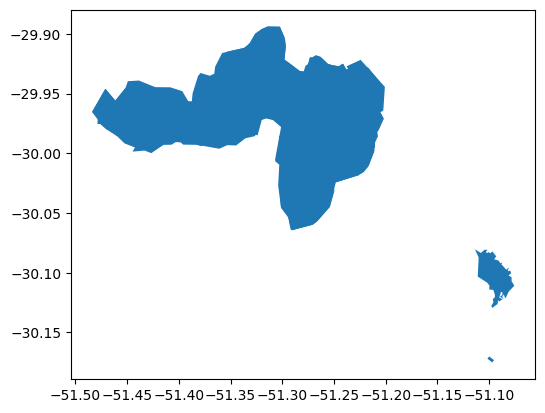

In [14]:
# Plotando as Ucs que estão no municípiop de Porto Alegre
uc_gdf_poa.plot()

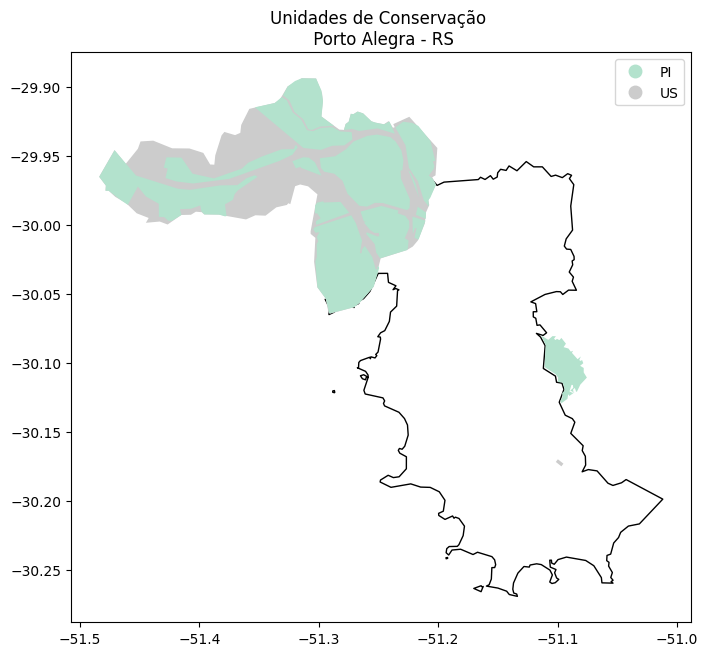

In [23]:
# Plotando as Bases

fig, ax = plt.subplots(figsize=(8, 8))
# Mapa de fundo
base = gdf_muni.plot(ax=ax, color='white', edgecolor='black')
uc_gdf_poa.plot(ax=base, column='group', legend=True, cmap='Pastel2')
ax.set_title('Unidades de Conservação \n Porto Alegra - RS')
plt.show()